In [42]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X,columns=iris.feature_names)
# df.tail(9)
df['species'] = y
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
#datani Train ve Test edirik
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [44]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
#Modelin qurulmasi
model = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [46]:
#Test  proqnozlasdirilmasi
y_pred = model.predict(X_test)

#neticeler qiymetlendirilmesi
print("deqiqlik:",accuracy_score(y_test,y_pred))
print("cunfision matrix:\n",confusion_matrix(y_test,y_pred))
print("classfication report:\n", classification_report(y_test,y_pred))

deqiqlik: 0.9777777777777777
cunfision matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
classfication report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



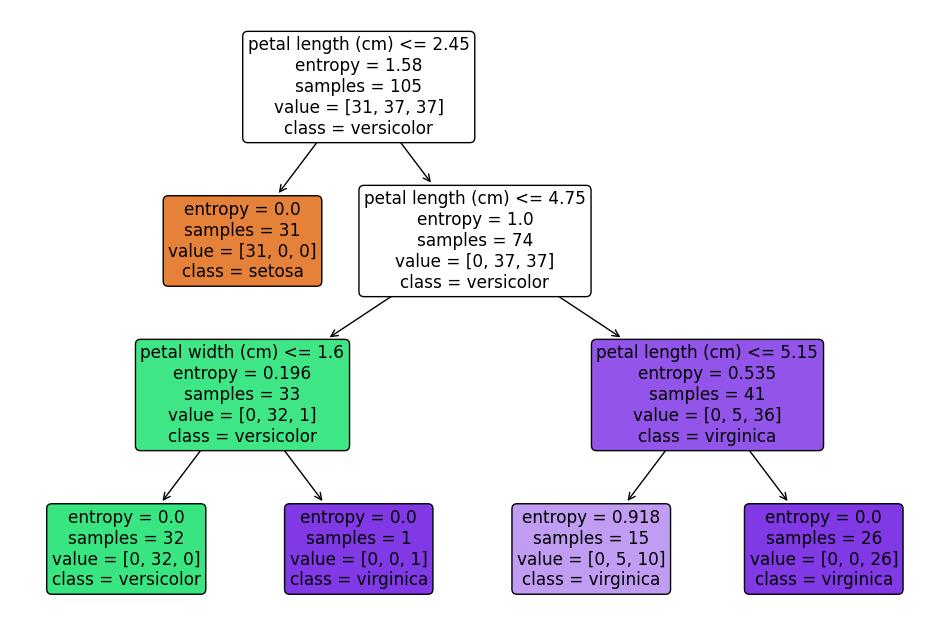

In [47]:
#Decision Tree vizuallasdirilmasi
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=list(iris.target_names), filled=True, rounded=True)
plt.show()

In [48]:
#Cross validation istifade ederek neticeleri muqayise edirik
train_cv_scores =  cross_val_score(model,X_train,y_train,cv=3,scoring='accuracy')
mean_train_cv_accuracy = train_cv_scores.mean()
print("The mean accuracy using 3-fold cross validation on training data : ",mean_train_cv_accuracy)

The mean accuracy using 3-fold cross validation on training data :  0.9333333333333332


In [49]:
test_cv_scores =  cross_val_score(model,X_test,y_test,cv=3,scoring='accuracy')
mean_test_cv_accuracy = test_cv_scores.mean()
print("The mean accuracy using 3-fold cross validation on test data : ",mean_test_cv_accuracy)

The mean accuracy using 3-fold cross validation on test data :  0.9555555555555556
